### Clustering in new way (WIP)

In [45]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df_combined = pd.read_csv('data/combined_comments_processed.csv')

# Filter comments for Israel and Palestine
df_israel = df_combined[df_combined['search_query'] == 'Israel'].copy()
df_palestine = df_combined[df_combined['search_query'] == 'Palestine'].copy()

# Select features
features_israel = df_israel[['sentiment_score', 'lix_score', 'upvotes']]
features_palestine = df_palestine[['sentiment_score', 'lix_score', 'upvotes']]

# Combine features for consistent scaling
combined_features = pd.concat([features_israel, features_palestine])

# Scale features
scaler = StandardScaler()
scaler.fit(combined_features)

X_israel_scaled = scaler.transform(features_israel)
X_palestine_scaled = scaler.transform(features_palestine)

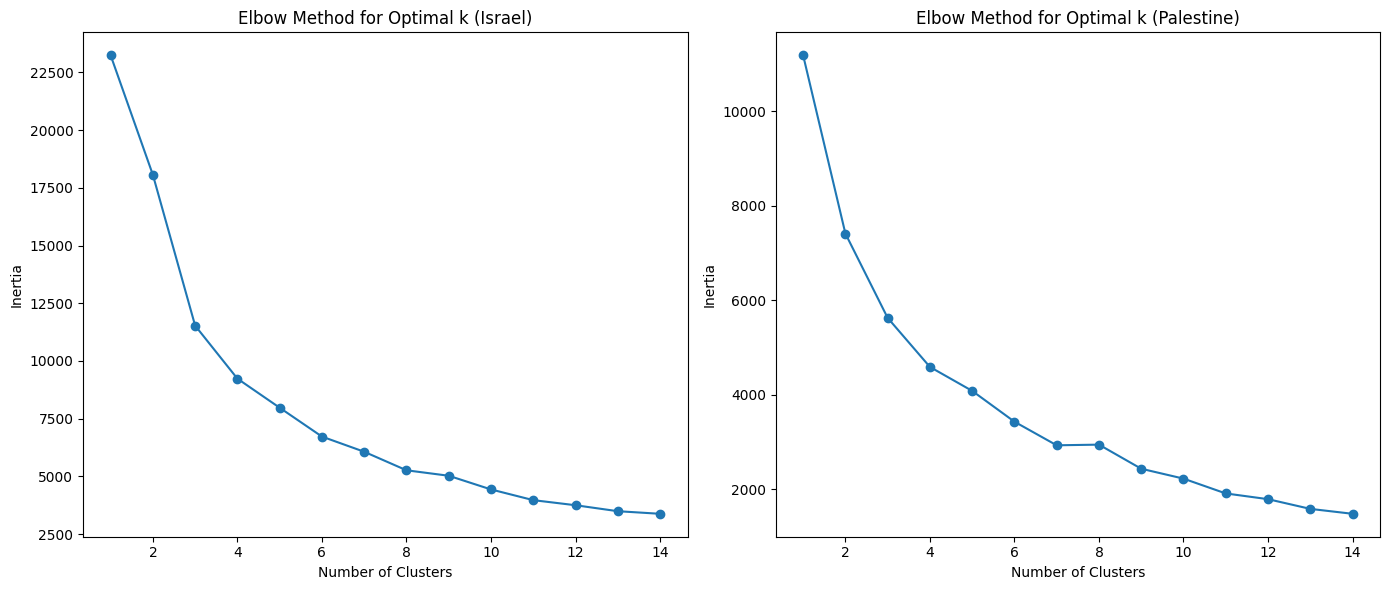

In [51]:
# Determine optimal k for Israel
inertia_israel = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_israel_scaled)
    inertia_israel.append(kmeans.inertia_)

# Determine optimal k for Palestine
inertia_palestine = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_palestine_scaled)
    inertia_palestine.append(kmeans.inertia_)

# Create side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Israel
ax[0].plot(range(1, 15), inertia_israel, marker='o')
ax[0].set_title('Elbow Method for Optimal k (Israel)')
ax[0].set_xlabel('Number of Clusters')
ax[0].set_ylabel('Inertia')

# Plot for Palestine
ax[1].plot(range(1, 15), inertia_palestine, marker='o')
ax[1].set_title('Elbow Method for Optimal k (Palestine)')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Inertia')

# Show the plots
plt.tight_layout()
plt.show()

In [52]:
# Perform clustering
kmeans_israel = KMeans(n_clusters=6, random_state=42)
df_israel['cluster'] = kmeans_israel.fit_predict(X_israel_scaled)

kmeans_palestine = KMeans(n_clusters=8, random_state=42)
df_palestine['cluster'] = kmeans_palestine.fit_predict(X_palestine_scaled)

# Cluster summary
cluster_summary_israel = df_israel.groupby('cluster')[['sentiment_score', 'lix_score', 'upvotes']].mean()
print("Cluster Summary (Israel):\n", cluster_summary_israel)

cluster_summary_palestine = df_palestine.groupby('cluster')[['sentiment_score', 'lix_score', 'upvotes']].mean()
print("Cluster Summary (Palestine):\n", cluster_summary_palestine)

Cluster Summary (Israel):
          sentiment_score  lix_score       upvotes
cluster                                          
0              -0.654244  33.048414    246.174125
1               0.101732  18.151744    209.760047
2              -0.123299  34.694131   3866.692708
3               0.439182  38.126529    218.768229
4              -0.438563  57.541398    298.036432
5               0.047424  37.901676  10127.517241
Cluster Summary (Palestine):
          sentiment_score  lix_score      upvotes
cluster                                         
0               0.079657   8.606366    94.254499
1              -0.675249  45.950029   117.344619
2               0.464027  42.701018   102.979432
3              -0.592415  28.038001    99.681693
4              -0.038896  36.519710  1991.216216
5              -0.113189  70.042464   126.223140
6              -0.055030  37.111589  5754.400000
7               0.291807  26.320119    86.419650
